# Applications and Properties of 2D Fourier Transform
The Fourier Transform (FT) of a signal gives the spatial frequency distribution of that signal – a sort of histogram of spatial frequencies which make up the signal. Unlike ordinary histograms, however, FTs are 
reversible, meaning you can recover the original image from the FT by using inverse FT. In this activity, we will explore more properties and applications of the Fourier Transform.

In [1]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from scipy import stats

plt.rcParams["figure.figsize"] = (4,4)
# plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 300

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
def aperture_fft(aperture_shape):
    fig, ax = plt.subplots(1, 3, figsize = (9, 4), sharey = True, tight_layout = True)
    ax[0].imshow(aperture_shape, cmap = "gray")
    ax[0].set_title("Aperture")
    ax[0].axis("off")
    
    fft_aperture = fft.fft2(aperture_shape)
    fftshift_aperture = fft.fftshift(abs(fft_aperture))
    ax[1].imshow(fftshift_aperture, cmap = "hot")
    ax[1].set_title("FFT")
    ax[1].axis("off")
    
    ax[2].imshow(np.log(fftshift_aperture), cmap = "hot")
    ax[2].set_title("FFT in log scale")
    ax[2].axis("off")

## Activity 3.1 - Rotation Property of the FT

In [3]:
def sinusoid(freq, angle, resolution):
    x = np.linspace(-1, 1, resolution)
    X, Y = np.meshgrid(x, x)
    grating = np.sin(2*np.pi*freq*(X*np.cos(angle) + Y*np.sin(angle)))
    return grating

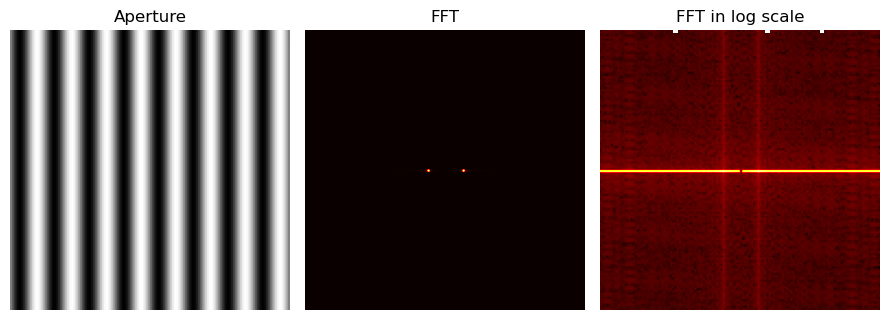

In [57]:
aperture_fft(sinusoid(4, np.pi, 128))

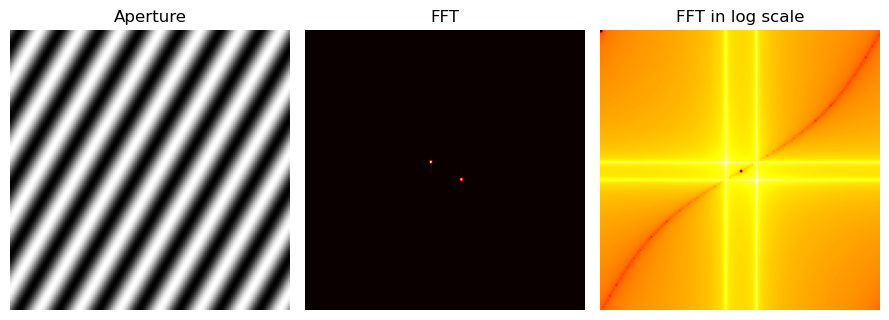

In [58]:
aperture_fft(sinusoid(4, np.pi/6, 128))

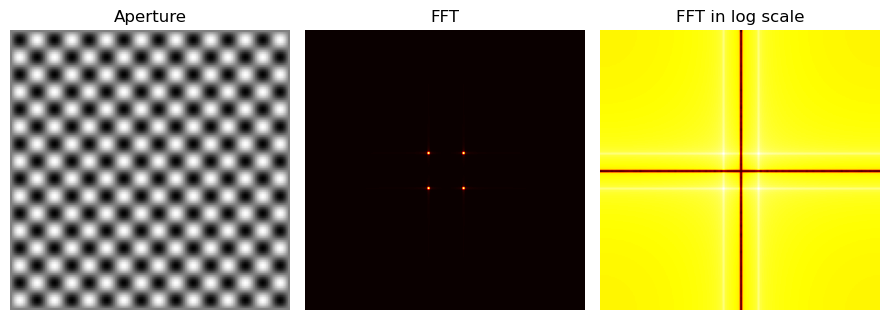

In [60]:
aperture_fft(sinusoid(4, np.pi, 128)*sinusoid(4, np.pi/2, 128))

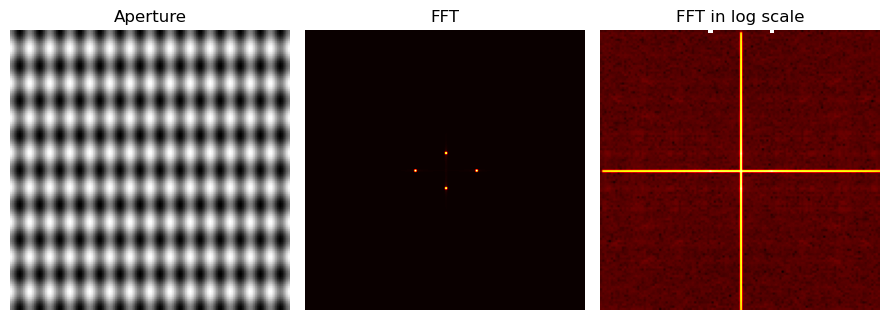

In [61]:
aperture_fft(sinusoid(4, np.pi/6, 128)*sinusoid(4, 5*np.pi/6, 128))

In [8]:
def sinusoid_fft_comparison(aperture_shape):
    fft_aperture = fft.fft2(aperture_shape)
    fftshift_aperture = fft.fftshift(abs(fft_aperture))
    return fftshift_aperture, np.log(fftshift_aperture)

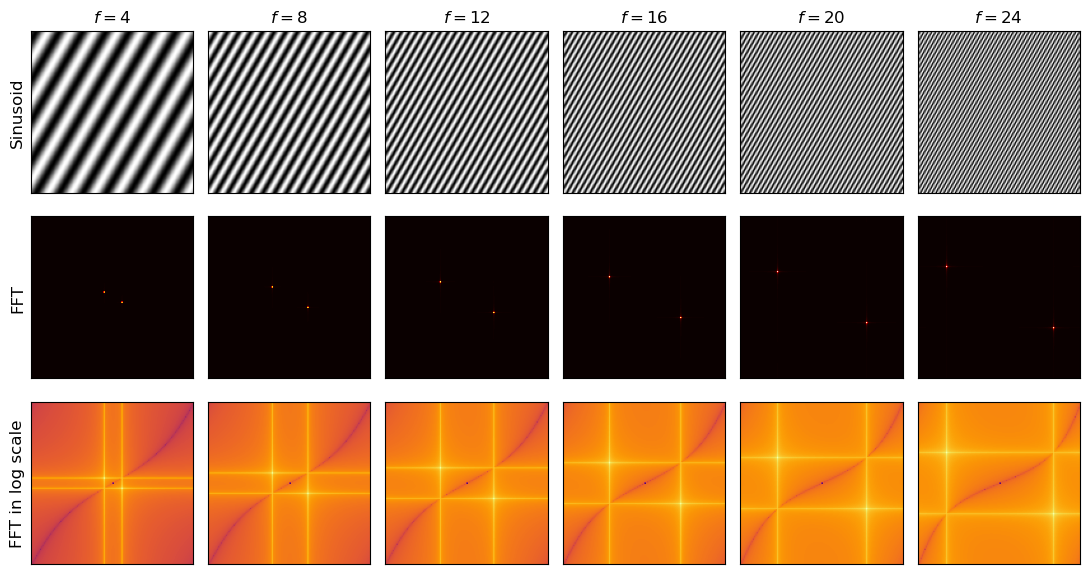

In [107]:
frequencies = [4, 8, 12, 16, 20, 24]
resolution = 128
angle = np.pi/6

fig, ax = plt.subplots(3, len(frequencies), figsize = (11, 6), tight_layout = True)
for i, f in enumerate(frequencies):
    ax[0,i].imshow(sinusoid(f, angle, resolution), cmap = "gray")
    ax[0,i].set_title("$f = {}$".format(f))
    ax[1,i].imshow(sinusoid_fft_comparison(sinusoid(f, angle, resolution))[0], cmap = "hot")
    ax[2,i].imshow(sinusoid_fft_comparison(sinusoid(f, angle, resolution))[1], cmap = "inferno")
    
    ax[0,0].set_ylabel("Sinusoid", fontsize = 12)
    ax[1,0].set_ylabel("FFT", fontsize = 12)
    ax[2,0].set_ylabel("FFT in log scale", fontsize = 12)
    
    ax[0,i].tick_params(axis = 'both', which = 'both', length = 0)
    ax[1,i].tick_params(axis = 'both', which = 'both', length = 0)
    ax[2,i].tick_params(axis = 'both', which = 'both', length = 0)
    
    plt.setp(ax[0,i].get_xticklabels(), visible = False)
    plt.setp(ax[1,i].get_xticklabels(), visible = False)
    plt.setp(ax[2,i].get_xticklabels(), visible = False)
    
    plt.setp(ax[0,i].get_yticklabels(), visible = False)
    plt.setp(ax[1,i].get_yticklabels(), visible = False)
    plt.setp(ax[2,i].get_yticklabels(), visible = False)

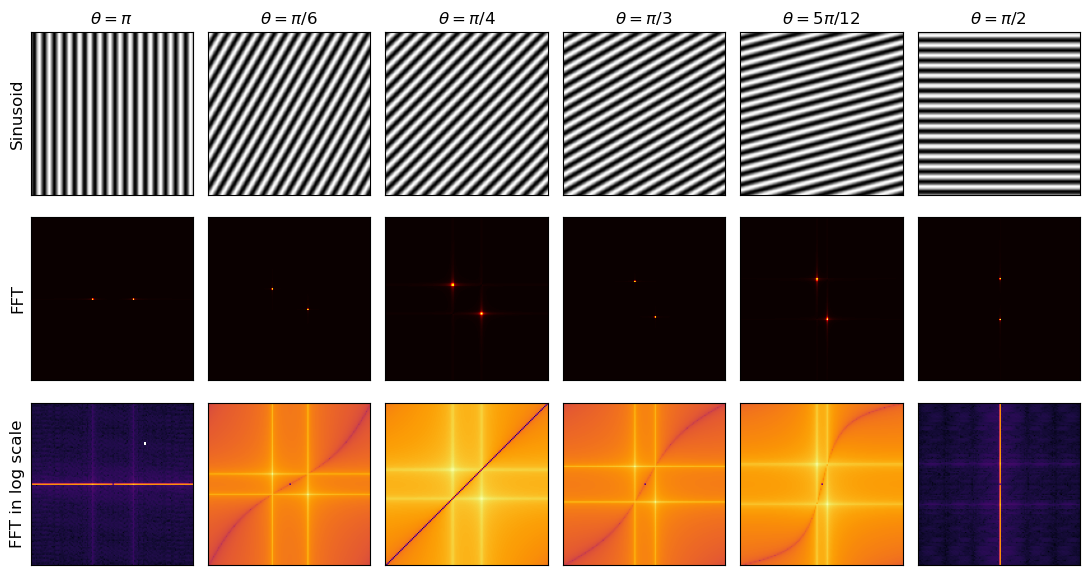

In [111]:
rotation_xaxis = [np.pi, np.pi/6, np.pi/4, np.pi/3, 5*np.pi/12, np.pi/2]
plot_title = [r"$\theta = \pi$", r"$\theta = \pi/6$", r"$\theta = \pi/4$", r"$\theta = \pi/3$", 
              r"$\theta = 5\pi/12$", r"$\theta = \pi/2$"]
resolution = 128
frequency = 8

fig, ax = plt.subplots(3, len(rotation_xaxis), figsize = (11, 6), tight_layout = True)
for (i, theta), title in zip(enumerate(rotation_xaxis), plot_title):
    ax[0,i].imshow(sinusoid(frequency, theta, resolution), cmap = "gray")
    ax[0,i].set_title(r"{}".format(title))
    ax[1,i].imshow(sinusoid_fft_comparison(sinusoid(frequency, theta, resolution))[0], cmap = "hot")
    ax[2,i].imshow(sinusoid_fft_comparison(sinusoid(frequency, theta, resolution))[1], cmap = "inferno")
    
    ax[0,0].set_ylabel("Sinusoid", fontsize = 12)
    ax[1,0].set_ylabel("FFT", fontsize = 12)
    ax[2,0].set_ylabel("FFT in log scale", fontsize = 12)
    
    ax[0,i].tick_params(axis = 'both', which = 'both', length = 0)
    ax[1,i].tick_params(axis = 'both', which = 'both', length = 0)
    ax[2,i].tick_params(axis = 'both', which = 'both', length = 0)
    
    plt.setp(ax[0,i].get_xticklabels(), visible = False)
    plt.setp(ax[1,i].get_xticklabels(), visible = False)
    plt.setp(ax[2,i].get_xticklabels(), visible = False)
    
    plt.setp(ax[0,i].get_yticklabels(), visible = False)
    plt.setp(ax[1,i].get_yticklabels(), visible = False)
    plt.setp(ax[2,i].get_yticklabels(), visible = False)

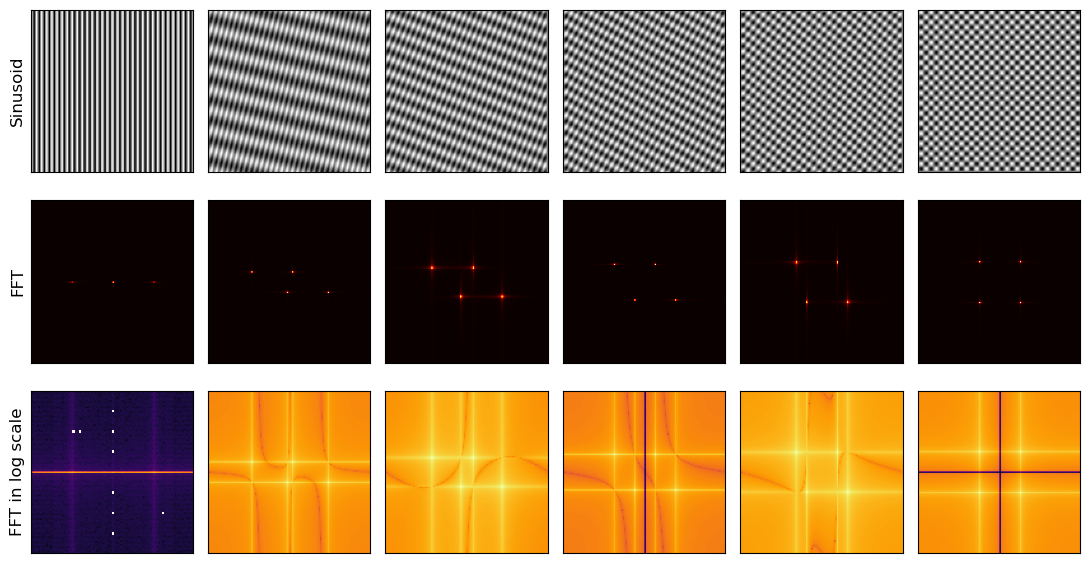

In [112]:
offset_angle = [np.pi, np.pi/6, np.pi/4, np.pi/3, 5*np.pi/12, np.pi/2]
resolution = 128
frequency = 8

fig, ax = plt.subplots(3, len(rotation_xaxis), figsize = (11, 6), tight_layout = True)
for i, theta in enumerate(offset_angle):
    ax[0,i].imshow(sinusoid(frequency, 0, resolution)*sinusoid(frequency, theta, resolution), cmap = "gray")
    ax[1,i].imshow(sinusoid_fft_comparison(sinusoid(frequency, 0, resolution)*
                   sinusoid(frequency, theta, resolution))[0], cmap = "hot")
    ax[2,i].imshow(sinusoid_fft_comparison(sinusoid(frequency, 0, resolution)*
                   sinusoid(frequency, theta, resolution))[1], cmap = "inferno")
    
    ax[0,0].set_ylabel("Sinusoid", fontsize = 12)
    ax[1,0].set_ylabel("FFT", fontsize = 12)
    ax[2,0].set_ylabel("FFT in log scale", fontsize = 12)
    
    ax[0,i].tick_params(axis = 'both', which = 'both', length = 0)
    ax[1,i].tick_params(axis = 'both', which = 'both', length = 0)
    ax[2,i].tick_params(axis = 'both', which = 'both', length = 0)
    
    plt.setp(ax[0,i].get_xticklabels(), visible = False)
    plt.setp(ax[1,i].get_xticklabels(), visible = False)
    plt.setp(ax[2,i].get_xticklabels(), visible = False)
    
    plt.setp(ax[0,i].get_yticklabels(), visible = False)
    plt.setp(ax[1,i].get_yticklabels(), visible = False)
    plt.setp(ax[2,i].get_yticklabels(), visible = False)

## Activity 2 - Canvas Weave Modeling and Removal

In [11]:
orig_painting = Image.open("painting by daria.png")
grayscale_painting = np.array(orig_painting.convert("L"))
mean_grayscale = grayscale_painting - np.mean(grayscale_painting)

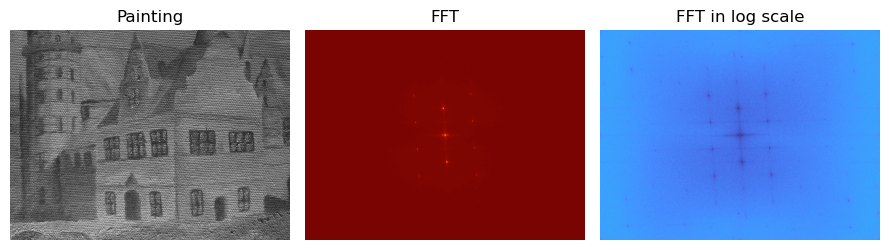

In [138]:
fig, ax = plt.subplots(1, 3, figsize = (9, 4), tight_layout = True)
ax[0].imshow(mean_grayscale, cmap = "gray")
ax[0].set_title("Painting")
ax[1].imshow(fft.fftshift(abs(fft.fft2(mean_grayscale))), cmap = "turbo_r")
ax[1].set_title("FFT")
ax[2].imshow(np.log(abs(fft.fftshift(fft.fft2(mean_grayscale)))), cmap = "turbo_r")
ax[2].set_title("FFT in log scale")

for a in ax:
    a.axis("off")

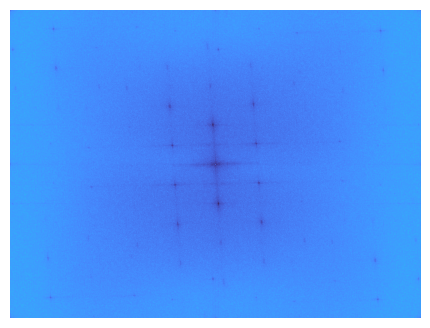

In [139]:
unmasked_FFT = np.log(abs(fft.fftshift(fft.fft2(mean_grayscale))))
plt.figure(figsize = (9, 4))
plt.imshow(unmasked_FFT, cmap = "turbo_r")
plt.axis("off")
plt.imsave("unmasked filter.png", unmasked_FFT, cmap = "turbo_r")